In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

# This relates to plotting datetime values with matplotlib:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
df = pd.read_csv('./Alcohol_Sales.csv',index_col=0,parse_dates=True)

In [3]:
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


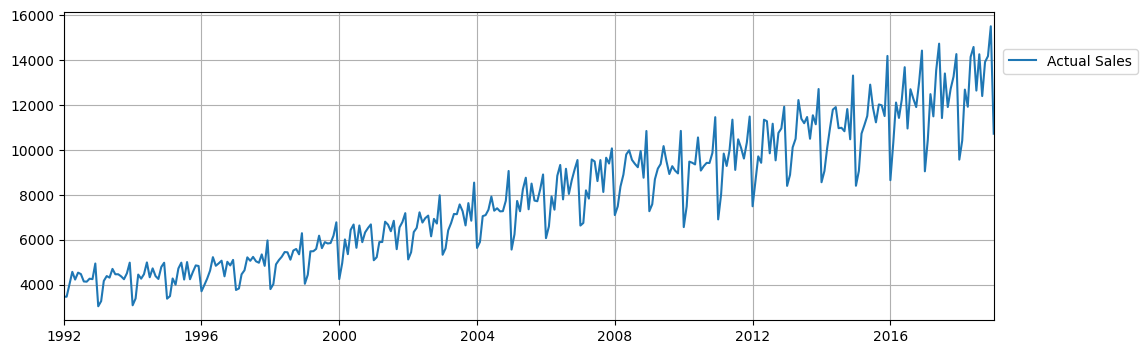

In [5]:
plt.figure(figsize=(12,4))
plt.grid(True)
plt.plot(df['S4248SM144NCEN'],label='Actual Sales')
plt.autoscale(axis='x',tight=True)
plt.legend(loc=(1.01,0.8))

In [5]:
df['S4248SM144NCEN'].describe()

count      325.000000
mean      7886.400000
std       2914.269061
min       3031.000000
25%       5231.000000
50%       7481.000000
75%       9977.000000
max      15504.000000
Name: S4248SM144NCEN, dtype: float64

In [6]:
y = df['S4248SM144NCEN'].values.astype(float)

In [7]:
y

array([ 3459.,  3458.,  4002.,  4564.,  4221.,  4529.,  4466.,  4137.,
        4126.,  4259.,  4240.,  4936.,  3031.,  3261.,  4160.,  4377.,
        4307.,  4696.,  4458.,  4457.,  4364.,  4236.,  4500.,  4974.,
        3075.,  3377.,  4443.,  4261.,  4460.,  4985.,  4324.,  4719.,
        4374.,  4248.,  4784.,  4971.,  3370.,  3484.,  4269.,  3994.,
        4715.,  4974.,  4223.,  5000.,  4235.,  4554.,  4851.,  4826.,
        3699.,  3983.,  4262.,  4619.,  5219.,  4836.,  4941.,  5062.,
        4365.,  5012.,  4850.,  5097.,  3758.,  3825.,  4454.,  4635.,
        5210.,  5057.,  5231.,  5034.,  4970.,  5342.,  4831.,  5965.,
        3796.,  4019.,  4898.,  5090.,  5237.,  5447.,  5435.,  5107.,
        5515.,  5583.,  5346.,  6286.,  4032.,  4435.,  5479.,  5483.,
        5587.,  6176.,  5621.,  5889.,  5828.,  5849.,  6180.,  6771.,
        4243.,  4952.,  6008.,  5353.,  6435.,  6673.,  5636.,  6630.,
        5887.,  6322.,  6520.,  6678.,  5082.,  5216.,  5893.,  5894.,
      

In [8]:
test_size = 12
train_set = y[:-test_size]
test_set = y[-test_size:]

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler(feature_range=(-1,1))

In [11]:
train_set_scalled = scaler.fit_transform(train_set.reshape(-1,1))


In [12]:
# test_set_scalled = scaler.fit_transform(test_set.reshape(1,-1))

In [13]:
train_set_scalled.min()

np.float64(-1.0)

In [14]:
train_set_scalled.max()

np.float64(1.0)

In [15]:
# test_set_scalled.min()

In [16]:
# test_set_scalled.max()

In [17]:
type(train_set_scalled)

numpy.ndarray

In [18]:
torch.FloatTensor(train_set_scalled).shape

torch.Size([313, 1])

In [19]:
torch.FloatTensor(train_set_scalled).reshape(-1).shape

torch.Size([313])

In [20]:
train_set_scalled = torch.FloatTensor(train_set_scalled).reshape(-1)

window_size = 12

def input_data(seq,ws):

    out = []

    l = len(seq)
    for i in range(l-ws):

        window = seq[i:i+ws]
        label = seq[i+ws]
        out.append((window,label))

    return out

train_data = input_data(train_set_scalled,window_size)
len(train_data)

301

In [21]:
train_data[0]

(tensor([-0.9268, -0.9270, -0.8340, -0.7379, -0.7966, -0.7439, -0.7547, -0.8109,
         -0.8128, -0.7901, -0.7933, -0.6743]),
 tensor(-1.))

In [22]:
class LSTM(nn.Module):

    def __init__(self,input_size,hidden_size,output_size):

        super().__init__()

        self.hidden_size = hidden_size
        self.hidden = (torch.zeros(1,1,hidden_size),torch.zeros(1,1,hidden_size))
        self.lstm = nn.LSTM(input_size,hidden_size)
        self.linear = nn.Linear(hidden_size,output_size)

    def forward(self,seq):

        lstm_out,self.hidden = self.lstm(seq.reshape(len(seq),1,-1),self.hidden)
        preds = self.linear(lstm_out.reshape(len(seq),-1)) # 12 * 100
        return preds[-1]

In [23]:
torch.manual_seed(101)

model = LSTM(1,100,1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

model

LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

In [24]:
total_params = 0

for p in model.parameters():
    total_params += p.numel()

total_params

41301

In [25]:
# epochs = 100

# for i in range(epochs):

#     for window,label in train_data:

#         optimizer.zero_grad()

#         model.hidden = (torch.zeros(1,1,model.hidden_size),torch.zeros(1,1,model.hidden_size))
#         y_preds = model.forward(window)
#         loss = criterion(y_preds,label)

#         loss.backward()
#         optimizer.step()

#     if i % 10 == 0:
#         print(f'Epoch : {i}  Loss : {loss.item()}')

In [26]:
# loss

In [27]:
# torch.save(model.state_dict(), 'Alcohol_model_weights.pt')

In [28]:
model.load_state_dict(torch.load('Alcohol_model_weights.pt'))

<All keys matched successfully>

In [29]:
model

LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

In [30]:
# future = 12
# preds = train_set_scalled[-future:].tolist()
# preds.shape
# # np.array([1,2,3]).shape


In [31]:
future = 12

preds = train_set_scalled[-future:].tolist()

model.eval()

for i in range(future):
 
    seq = torch.FloatTensor(preds[-window_size:])
    with torch.no_grad():
        
        model.hidden = (torch.zeros(1,1,model.hidden_size),torch.zeros(1,1,model.hidden_size))
        preds.append(model.forward(seq).item())

In [32]:
seq.shape

torch.Size([12])

In [33]:
preds[-window_size:]

[0.2061576545238495,
 0.6505273580551147,
 0.40835845470428467,
 0.7873188853263855,
 0.990841805934906,
 0.45151299238204956,
 0.7227265238761902,
 0.5061343908309937,
 0.5914949178695679,
 0.7300885319709778,
 0.9041674733161926,
 0.11803445219993591]

In [34]:
len(preds[-window_size:])

12

In [35]:
test_set.reshape(-1,1)

array([[10415.],
       [12683.],
       [11919.],
       [14138.],
       [14583.],
       [12640.],
       [14257.],
       [12396.],
       [13914.],
       [14174.],
       [15504.],
       [10718.]])

In [36]:
window_size

12

In [37]:
true_predictions = scaler.inverse_transform(np.array(preds[-window_size:]).reshape(-1,1))

In [38]:
true_predictions

array([[10086.41920014],
       [12685.75978094],
       [11269.19278079],
       [13485.92181972],
       [14676.42914382],
       [11521.62524894],
       [13108.08880141],
       [11841.13311917],
       [12340.44952208],
       [13151.15286776],
       [14169.42763516],
       [ 9570.94252814]])

In [39]:
true_predictions.shape

(12, 1)

In [40]:
from sklearn.metrics import root_mean_squared_error,accuracy_score

In [41]:
test_set

array([10415., 12683., 11919., 14138., 14583., 12640., 14257., 12396.,
       13914., 14174., 15504., 10718.])

In [42]:
test_mean = test_set.mean()

In [43]:
test_set.shape

(12,)

In [44]:
true_predictions.shape

(12, 1)

In [45]:
test_rmse = root_mean_squared_error(test_set.reshape(-1,1),true_predictions)

In [46]:
print(f'Accuracy : {(test_rmse * 100) / test_mean} %')

Accuracy : 7.121211755361276 %


In [47]:
df['S4248SM144NCEN'][-window_size:]

DATE
2018-02-01    10415
2018-03-01    12683
2018-04-01    11919
2018-05-01    14138
2018-06-01    14583
2018-07-01    12640
2018-08-01    14257
2018-09-01    12396
2018-10-01    13914
2018-11-01    14174
2018-12-01    15504
2019-01-01    10718
Name: S4248SM144NCEN, dtype: int64

In [48]:
x = np.arange('2018-02-01','2019-02-01',dtype='datetime64[M]')

In [49]:
x

array(['2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07',
       '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01'],
      dtype='datetime64[M]')

In [50]:
df.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01'],
              dtype='datetime64[ns]', name='DATE', length=325, freq=None)

In [51]:
true_predictions.shape

(12, 1)

In [52]:
x.shape

(12,)

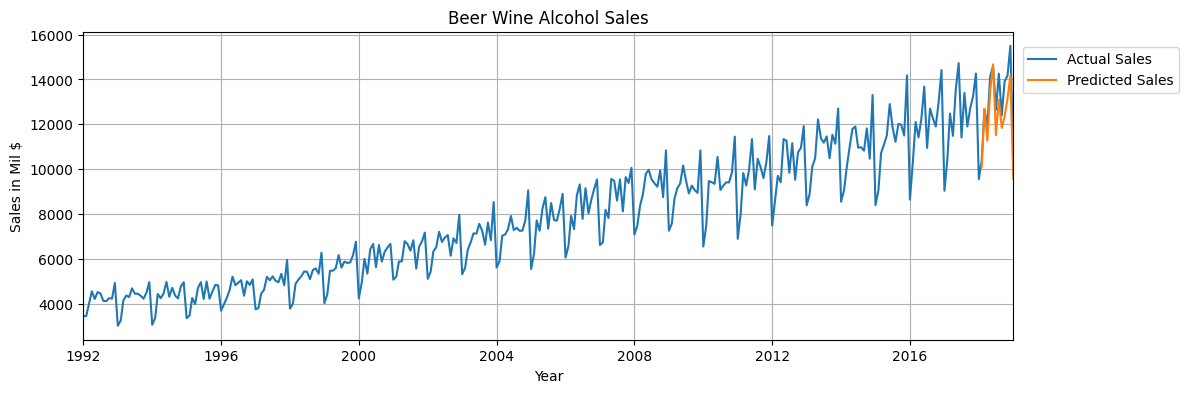

In [54]:
plt.figure(figsize=(12,4))
plt.title('Beer Wine Alcohol Sales')
plt.xlabel('Year')
plt.ylabel('Sales in Mil $')
plt.plot(df['S4248SM144NCEN'],label='Actual Sales')
plt.plot(x,true_predictions,label='Predicted Sales')
plt.autoscale(axis='x',tight=True)
plt.grid(True)
plt.legend(loc=(1.01,0.8))
plt.show()


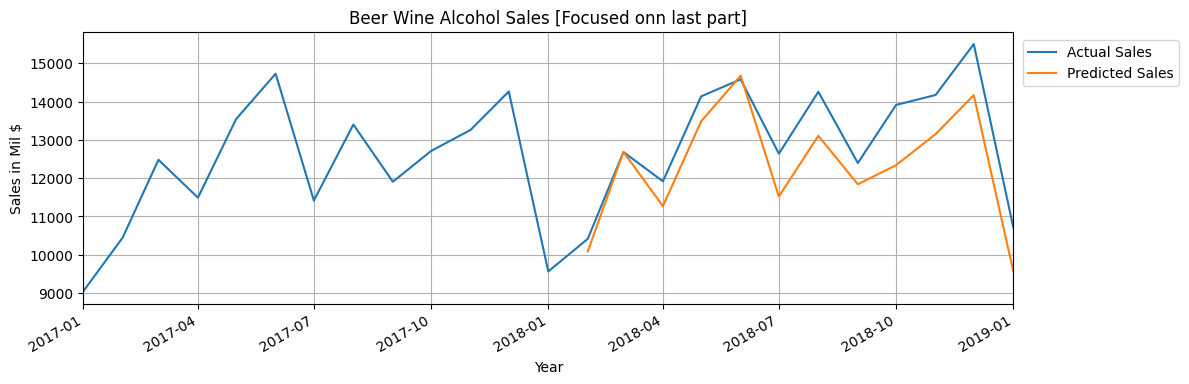

In [57]:
fig = plt.figure(figsize=(12,4))
plt.title('Beer Wine Alcohol Sales [Focused onn last part]')
plt.xlabel('Year')
plt.ylabel('Sales in Mil $')
plt.autoscale(axis='x',tight=True)
fig.autofmt_xdate()
plt.grid(True)
# plt.xlim(,2022)
plt.plot(df['S4248SM144NCEN']['2017-01-01':],label='Actual Sales')
plt.plot(x,true_predictions,label='Predicted Sales')
plt.legend(loc=(1.01,0.8))
plt.show()

In [58]:
scaler = MinMaxScaler(feature_range=(-1,1))

In [59]:
y

array([ 3459.,  3458.,  4002.,  4564.,  4221.,  4529.,  4466.,  4137.,
        4126.,  4259.,  4240.,  4936.,  3031.,  3261.,  4160.,  4377.,
        4307.,  4696.,  4458.,  4457.,  4364.,  4236.,  4500.,  4974.,
        3075.,  3377.,  4443.,  4261.,  4460.,  4985.,  4324.,  4719.,
        4374.,  4248.,  4784.,  4971.,  3370.,  3484.,  4269.,  3994.,
        4715.,  4974.,  4223.,  5000.,  4235.,  4554.,  4851.,  4826.,
        3699.,  3983.,  4262.,  4619.,  5219.,  4836.,  4941.,  5062.,
        4365.,  5012.,  4850.,  5097.,  3758.,  3825.,  4454.,  4635.,
        5210.,  5057.,  5231.,  5034.,  4970.,  5342.,  4831.,  5965.,
        3796.,  4019.,  4898.,  5090.,  5237.,  5447.,  5435.,  5107.,
        5515.,  5583.,  5346.,  6286.,  4032.,  4435.,  5479.,  5483.,
        5587.,  6176.,  5621.,  5889.,  5828.,  5849.,  6180.,  6771.,
        4243.,  4952.,  6008.,  5353.,  6435.,  6673.,  5636.,  6630.,
        5887.,  6322.,  6520.,  6678.,  5082.,  5216.,  5893.,  5894.,
      

In [60]:
y_scalled = scaler.fit_transform(y.reshape(-1,1))

In [61]:
y_scalled = torch.FloatTensor(y_scalled).reshape(-1)

In [62]:
y_scalled

tensor([-9.3137e-01, -9.3153e-01, -8.4430e-01, -7.5419e-01, -8.0919e-01,
        -7.5980e-01, -7.6990e-01, -8.2266e-01, -8.2442e-01, -8.0309e-01,
        -8.0614e-01, -6.9454e-01, -1.0000e+00, -9.6312e-01, -8.1897e-01,
        -7.8417e-01, -7.9540e-01, -7.3302e-01, -7.7119e-01, -7.7135e-01,
        -7.8626e-01, -8.0678e-01, -7.6445e-01, -6.8845e-01, -9.9294e-01,
        -9.4452e-01, -7.7359e-01, -8.0277e-01, -7.7087e-01, -6.8668e-01,
        -7.9267e-01, -7.2934e-01, -7.8465e-01, -8.0486e-01, -7.1891e-01,
        -6.8893e-01, -9.4564e-01, -9.2736e-01, -8.0149e-01, -8.4559e-01,
        -7.2998e-01, -6.8845e-01, -8.0887e-01, -6.8428e-01, -8.0694e-01,
        -7.5579e-01, -7.0817e-01, -7.1218e-01, -8.9289e-01, -8.4735e-01,
        -8.0261e-01, -7.4537e-01, -6.4916e-01, -7.1057e-01, -6.9374e-01,
        -6.7434e-01, -7.8610e-01, -6.8235e-01, -7.0833e-01, -6.6872e-01,
        -8.8343e-01, -8.7269e-01, -7.7183e-01, -7.4280e-01, -6.5061e-01,
        -6.7514e-01, -6.4724e-01, -6.7883e-01, -6.8

In [63]:
y_scalled.max()

tensor(1.)

In [64]:
y_scalled.min()

tensor(-1.)

In [65]:
all_data = input_data(y_scalled,window_size)

In [66]:
# epochs = 100

# model.train()

# for i in range(epochs):

#     for window,label in all_data:

#         optimizer.zero_grad()

#         model.hidden = (torch.zeros(1,1,model.hidden_size),torch.zeros(1,1,model.hidden_size))
#         y_preds = model.forward(window)
#         loss = criterion(y_preds,label)

#         loss.backward()
#         optimizer.step()

#     if i % 10 == 0:
#         print(f'Epoch : {i}  Loss : {loss.item()}')

In [67]:
# torch.save(model.state_dict(),'LSTM_Alcohol_model_whole_data.pt')

In [68]:
model = LSTM(1,100,1)
model.load_state_dict(torch.load('LSTM_Alcohol_model_whole_data.pt'))

<All keys matched successfully>

In [69]:
y_scalled

tensor([-9.3137e-01, -9.3153e-01, -8.4430e-01, -7.5419e-01, -8.0919e-01,
        -7.5980e-01, -7.6990e-01, -8.2266e-01, -8.2442e-01, -8.0309e-01,
        -8.0614e-01, -6.9454e-01, -1.0000e+00, -9.6312e-01, -8.1897e-01,
        -7.8417e-01, -7.9540e-01, -7.3302e-01, -7.7119e-01, -7.7135e-01,
        -7.8626e-01, -8.0678e-01, -7.6445e-01, -6.8845e-01, -9.9294e-01,
        -9.4452e-01, -7.7359e-01, -8.0277e-01, -7.7087e-01, -6.8668e-01,
        -7.9267e-01, -7.2934e-01, -7.8465e-01, -8.0486e-01, -7.1891e-01,
        -6.8893e-01, -9.4564e-01, -9.2736e-01, -8.0149e-01, -8.4559e-01,
        -7.2998e-01, -6.8845e-01, -8.0887e-01, -6.8428e-01, -8.0694e-01,
        -7.5579e-01, -7.0817e-01, -7.1218e-01, -8.9289e-01, -8.4735e-01,
        -8.0261e-01, -7.4537e-01, -6.4916e-01, -7.1057e-01, -6.9374e-01,
        -6.7434e-01, -7.8610e-01, -6.8235e-01, -7.0833e-01, -6.6872e-01,
        -8.8343e-01, -8.7269e-01, -7.7183e-01, -7.4280e-01, -6.5061e-01,
        -6.7514e-01, -6.4724e-01, -6.7883e-01, -6.8

In [70]:
preds = y_scalled[-window_size:].tolist()

model.eval()

for f in range(future):
    seq = torch.FloatTensor(preds[-window_size:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1,1,model.hidden_size),torch.zeros(1,1,model.hidden_size))
        preds.append(model.forward(seq).item())

In [71]:
preds

[0.18399743735790253,
 0.5476629734039307,
 0.4251583516597748,
 0.7809668779373169,
 0.8523210287094116,
 0.5407680869102478,
 0.8000481128692627,
 0.5016435384750366,
 0.7450492978096008,
 0.7867393493652344,
 1.0,
 0.23258237540721893,
 0.3119376003742218,
 0.6364127397537231,
 0.46497008204460144,
 0.7593963146209717,
 0.6687902212142944,
 0.64792799949646,
 0.8145171403884888,
 0.5164146423339844,
 0.7222321033477783,
 0.7469004392623901,
 0.9561008214950562,
 0.29828134179115295]

In [72]:
true_predictions = scaler.inverse_transform(np.array(preds).reshape(-1,1))

In [73]:
y_preds = true_predictions[-future:].reshape(12,)

In [74]:
y_preds[-future:].astype(int).tolist()

[11212,
 13236,
 12167,
 14003,
 13438,
 13308,
 14347,
 12488,
 13771,
 13925,
 15230,
 11127]

In [75]:
y[-future:].astype(int).tolist()

[10415,
 12683,
 11919,
 14138,
 14583,
 12640,
 14257,
 12396,
 13914,
 14174,
 15504,
 10718]

In [76]:
y_preds[-future:].shape

(12,)

In [77]:
y[-future:].shape

(12,)

In [78]:
rmse = root_mean_squared_error(y[-future:].astype(int).tolist(),y_preds[-future:].astype(int).tolist())

In [79]:
mean = np.mean(y[-future:].astype(int).tolist())

In [80]:
print(f'Error percentage : {(rmse * 100) / mean} %')

Error percentage : 3.88849866039839 %


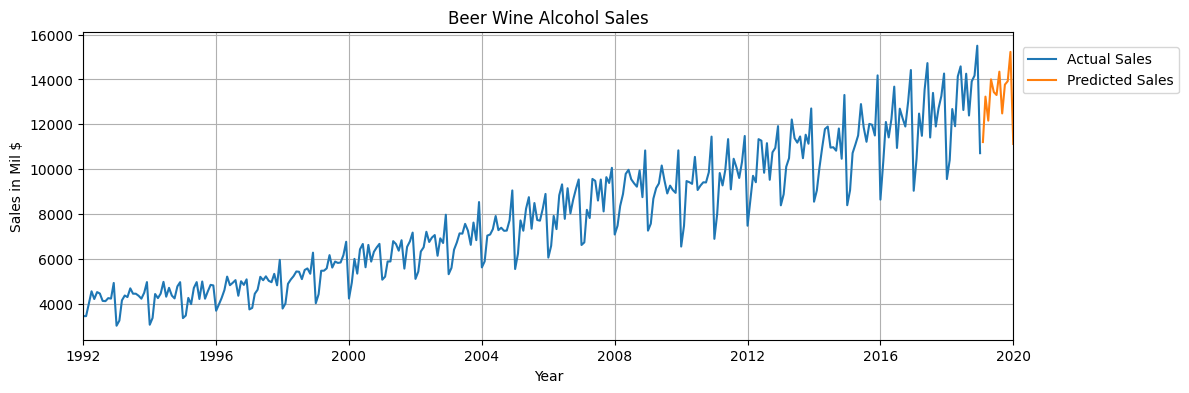

In [81]:
x = np.arange('2019-02-01','2020-02-01',dtype='datetime64[M]').astype('datetime64[D]')

plt.figure(figsize=(12,4))
plt.title('Beer Wine Alcohol Sales')
plt.xlabel('Year')
plt.ylabel('Sales in Mil $')
plt.plot(df['S4248SM144NCEN'],label='Actual Sales')
plt.plot(x,true_predictions[-window_size:],label='Predicted Sales')
plt.autoscale(axis='x',tight=True)
plt.grid(True)
plt.legend(loc=(1.01,0.8))
plt.show()

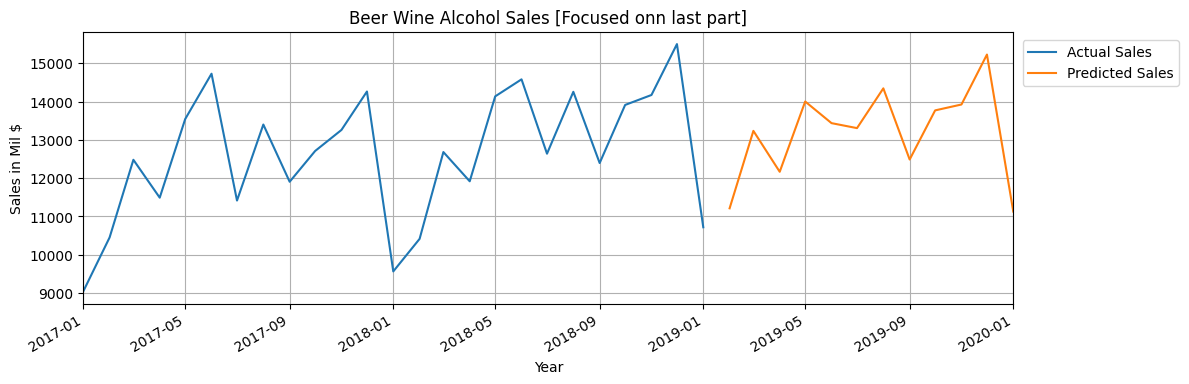

In [82]:
fig = plt.figure(figsize=(12,4))
plt.title('Beer Wine Alcohol Sales [Focused onn last part]')
plt.xlabel('Year')
plt.ylabel('Sales in Mil $')
plt.autoscale(axis='x',tight=True)
fig.autofmt_xdate()
plt.grid(True)
# plt.xlim(,2022)
plt.plot(df['S4248SM144NCEN']['2017-01-01':],label='Actual Sales')
plt.plot(x,true_predictions[window_size:],label='Predicted Sales')
plt.legend(loc=(1.01,0.8))
plt.show()